# MNIST Handwritten Digits Data


In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X=mnist['data']
y=mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
X[0][:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [8]:
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)

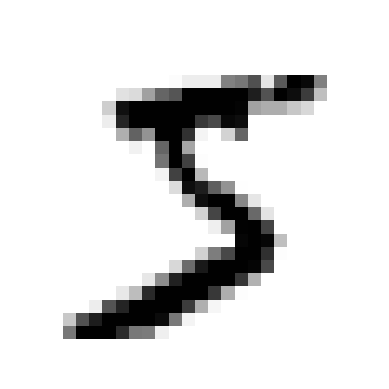

In [9]:
from matplotlib import pyplot as plt
plt.imshow(some_digit_image,cmap='binary',interpolation='nearest')
plt.axis('off')
plt.show()

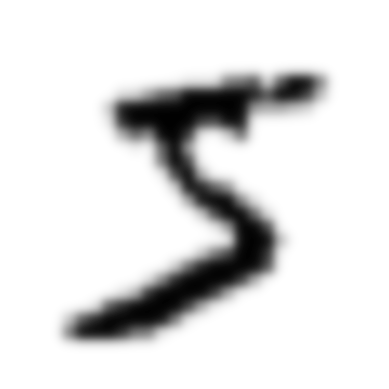

In [10]:
plt.imshow(some_digit_image,interpolation='gaussian',cmap='binary')
plt.axis('off')
plt.show()

In [11]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [12]:
import numpy as np
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
y_train=y_train.astype(np.uint8)
y_test=y_test.astype(np.uint8)

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Binary Classification

In [15]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [16]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train,y_train_5,cv=3,scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [22]:
cross_val_score(sgd,X_train_scaled,y_train_5,cv=3,scoring='accuracy')

array([0.9748, 0.9657, 0.9692])

#  Custom Cross-Validation

In [23]:
def cross_val_score(model,X,y,scoring='accuracy',cv=3):
  from sklearn.model_selection import StratifiedKFold
  skfolds=StratifiedKFold(n_splits=3)
  from sklearn.base import clone
  scores=[]
  for train_index,test_index in skfolds.split(X,y):
    clone_model=clone(model)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_model.fit(X_train_folds,y_train_folds)
    y_pred=clone_model.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    scores.append(n_correct/len(y_pred))
  return scores

In [25]:
cross_val_score(sgd,X_train,y_train_5,scoring='accuracy',cv=3)

[np.float64(0.95035), np.float64(0.96035), np.float64(0.9604)]

In [42]:
def cross_val_predict(model,X,y,scoring='accuracy',cv=3):
  from sklearn.model_selection import StratifiedKFold
  skfolds= StratifiedKFold(n_splits=3)
  from sklearn.base import clone
  scores=[]
  for train_index,test_index in skfolds.split(X,y):
    clone_model=clone(model)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_fold=X[test_index]
    y_test_fold=y[test_index]
    X_train_scaled_folds=X_train_folds/255
    X_test_scaled_fold=X_test_fold/255
    clone_model.fit( X_train_scaled_folds,y_train_folds)
    y_pred=clone_model.predict(X_test_scaled_fold)
    n_correct=sum(y_pred==y_test_fold)
    scores.append(n_correct/len(y_pred))
  return scores

In [43]:
cross_val_predict(sgd,X_train,y_train_5,scoring='accuracy',cv=3)

[np.float64(0.9748), np.float64(0.9657), np.float64(0.9692)]